# **Predicting Spotify's Popularity Score using Audio Features**
In this notebook, I will be using various regression and classification models to predict the popularity score of a Spotify song. This will be useful for an agency who is looking to sign an artist who auditioned with some tracks.

#### **Import necessary libraries**

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# **Regression Models to Predict the Numerical Popularity Score**

## **Overview of Datasets Used in Regression**
In this notebook, we have two main datasets for regression: the merged200k.csv dataset and the oversampled-using-SMOGN dataset. For fair comparison between the two dataset, <ins>**they must have the same test dataset**<ins>. 

In data-resampling.ipynb, we have split merged200k into train/test datasets: regression_training.csv and regression_test.csv. regression_training.csv was then oversampled using SMOGN, which is then saved as smogn.csv.

Let's first take a look at each of the 4 datasets (merged200k.csv, regression_training.csv, regression_test.csv, and smogn.csv).

In [2]:
# Convert csv to pandas dataframes
df = pd.read_csv("datasets/merged200k.csv")
regression_train = pd.read_csv("datasets/regression_training.csv")
regression_test = pd.read_csv("datasets/regression_test.csv")
df_smogn = pd.read_csv("datasets/smogn.csv")

In [3]:
# Select the relevant columns (audio features + track popularity)
relevant_columns = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo", "Track Popularity"]

df = df[relevant_columns]
regression_train = regression_train[relevant_columns]
regression_test = regression_test[relevant_columns]
df_smogn = df_smogn[relevant_columns]

In [4]:
df.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.550,0.545,-9.304,0.1630,0.3180,0.000000,0.0608,0.412,102.469,87
1,0.892,0.585,-7.269,0.1020,0.1460,0.000004,0.0881,0.244,104.011,38
2,0.568,0.788,-6.280,0.0377,0.0101,0.000000,0.1410,0.460,104.959,66
3,0.567,0.503,-6.119,0.1240,0.5810,0.000000,0.3690,0.184,72.798,60
4,0.668,0.392,-12.178,0.0585,0.7890,0.002750,0.3450,0.323,135.936,73


In [5]:
# Check the dataframe is converted and cleaned properly
regression_train.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.596,0.574,-11.148,0.0281,0.00129,0.191000,0.1150,0.3970,132.001,54
1,0.559,0.675,-13.257,0.7280,0.69000,0.000000,0.6980,0.8080,86.717,10
2,0.161,0.296,-17.388,0.0381,0.70900,0.917000,0.1110,0.0795,109.055,27
3,0.573,0.510,-7.637,0.0352,0.73900,0.000118,0.0768,0.4580,76.494,37
4,0.648,0.808,-7.098,0.0420,0.02080,0.000005,0.0829,0.5040,143.972,56


In [6]:
regression_test.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.353,0.086,-26.781,0.0567,0.9630,0.000223,0.325,0.039,88.314,15
1,0.608,0.852,-6.885,0.0419,0.0021,0.505000,0.369,0.640,148.004,47
2,0.830,0.675,-7.362,0.0380,0.3910,0.134000,0.129,0.573,135.017,48
3,0.438,0.851,-4.958,0.0470,0.3380,0.192000,0.375,0.646,83.965,27
4,0.536,0.539,-17.764,0.9400,0.8440,0.000000,0.821,0.282,95.331,33


In [7]:
df_smogn.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.661094,0.935059,0.0,0.401172,0.092491,0.112705,0.102991,0.583689,126.424800,66.0
1,0.733068,0.911161,0.0,0.339748,0.127725,0.000000,0.209929,0.623415,126.896859,99.0
2,0.698725,0.877788,0.0,0.267675,0.078193,0.000002,0.086721,0.418481,126.121441,99.0
3,0.657263,0.936414,0.0,0.389150,0.088702,0.124403,0.102678,0.572551,126.407239,66.0
4,0.690785,0.925687,0.0,0.449504,0.109218,0.146696,0.159388,0.632482,126.513678,99.0


## **Comparing Which Dataset Performs Better in a <u>Linear Regression Model</u>**

Let's start with the <u>non-sampled</u> dataset (regression_train and regression_test). 

In [8]:
# Import sci-kit library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Predict track popularity score using <u>**linear regression**</u> in <u>non-sampled dataset</u>.

In [9]:
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]

# Use the training dataset oversampled with SMOGN technique
y_train = pd.DataFrame(regression_train['Track Popularity'])   # Response
X_train = pd.DataFrame(regression_train[predictors]) # Predictor

# Use the same test dataset for fair comparison
y_test = pd.DataFrame(regression_test['Track Popularity'])   # Response
X_test = pd.DataFrame(regression_test[predictors]) # Predictor

# Linear Regression using Train Data
non_sampled_linreg = LinearRegression()    
non_sampled_linreg.fit(X_train, y_train)     

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', non_sampled_linreg.intercept_)
print('Coefficients of Regression \t: a = ', non_sampled_linreg.coef_)
print()

# Predict popularity values corresponding to predictors
y_train_pred = non_sampled_linreg.predict(X_train)
y_test_pred = non_sampled_linreg.predict(X_test)

# # Clip the predictions to be within the range [0, 100]
y_train_pred = np.clip(y_train_pred, 0, 100)
y_test_pred = np.clip(y_test_pred, 0, 100)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tNon-sampled Train Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tNon-sampled Test Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Intercept of Regression 	: b =  [47.21943299]
Coefficients of Regression 	: a =  [[ 1.85165498e+01 -5.36595936e+00  5.29422667e-01 -8.89801002e+00
  -8.54540047e+00 -2.32671680e+00 -8.16270839e+00 -1.02989333e+01
   3.19149228e-03]]

Goodness of Fit of Model 	Non-sampled Train Dataset
Explained Variance (R^2) 	: 0.18797500428421432
Mean Squared Error (MSE) 	: 225.8808611133835
Root Mean Squared Error (RMSE) 	: 15.029333355587783

Goodness of Fit of Model 	Non-sampled Test Dataset
Explained Variance (R^2) 	: 0.19034460038090584
Mean Squared Error (MSE) 	: 226.66989603062234
Root Mean Squared Error (RMSE) 	: 15.055560302779247



It seems that the R^2 score is on the lower end at around 0.20 from the maximum best score of 1.00. The RMSE is also moderately high at around 15. Let's see if the oversampled SMOGN dataset will perform better.

### Predict track popularity score using <u>**linear regression**</u> in <u>oversampled SMOGN dataset</u>.

In [10]:
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]

# Use the training dataset oversampled with SMOGN technique
smogn_y_train = pd.DataFrame(df_smogn['Track Popularity'])   # Response
smogn_X_train = pd.DataFrame(df_smogn[predictors]) # Predictor

# Use the same test dataset as normal linear regression for fair comparison
y_test = pd.DataFrame(regression_test['Track Popularity'])   # Response
X_test = pd.DataFrame(regression_test[predictors]) # Predictor

# Linear Regression using Train Data
smogn_linreg = LinearRegression()         
smogn_linreg.fit(smogn_X_train, smogn_y_train)  

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', smogn_linreg.intercept_)
print('Coefficients of Regression \t: a = ', smogn_linreg.coef_)
print()

# Predict popularity values corresponding to predictors
smogn_y_train_pred = smogn_linreg.predict(smogn_X_train)
smogn_y_test_pred = smogn_linreg.predict(X_test)

# # Clip the predictions to be within the range [0, 100]
smogn_y_train_pred = np.clip(smogn_y_train_pred, 0, 100)
smogn_y_test_pred = np.clip(smogn_y_test_pred, 0, 100)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(smogn_y_train, smogn_y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(smogn_y_train, smogn_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(smogn_y_train, smogn_y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(y_test, smogn_y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, smogn_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, smogn_y_test_pred)))
print()

Intercept of Regression 	: b =  [89.80959031]
Coefficients of Regression 	: a =  [[ 1.21003814e+01 -3.04395125e+01  2.83829663e+00 -4.92302141e+00
  -6.16767414e+00  3.70064330e+00 -8.43037350e+00 -6.19619939e+00
  -4.40989990e-03]]

Goodness of Fit of Model 	Train Dataset with SMOGN Sampling
Explained Variance (R^2) 	: 0.5217680666262854
Mean Squared Error (MSE) 	: 279.76688829275673
Root Mean Squared Error (RMSE) 	: 16.72623353575923

Goodness of Fit of Model 	Test Dataset with SMOGN Sampling
Explained Variance (R^2) 	: -0.1187648669393555
Mean Squared Error (MSE) 	: 313.20771304824177
Root Mean Squared Error (RMSE) 	: 17.69767535718298



Unfortunately, while the SMOGN dataset improves the R^2 score significantly for the training set, it worsens the score for the testing set. <ins>**This might be because the linear regression model is overfitted on the training set**<ins>.

SMOGN oversamples popular songs to balance the dataset, but the difference in the amount of synthetic popular songs and real popular songs is significant. As such, the linear regression model learns the patterns, noise and artifacts introduced by the synthetic data instead of the real data. As such, it performs well in training data but poorly on unseen, real-word data.

### Plot and compare the datasets' performance in a <u>**linear regression model**</u>

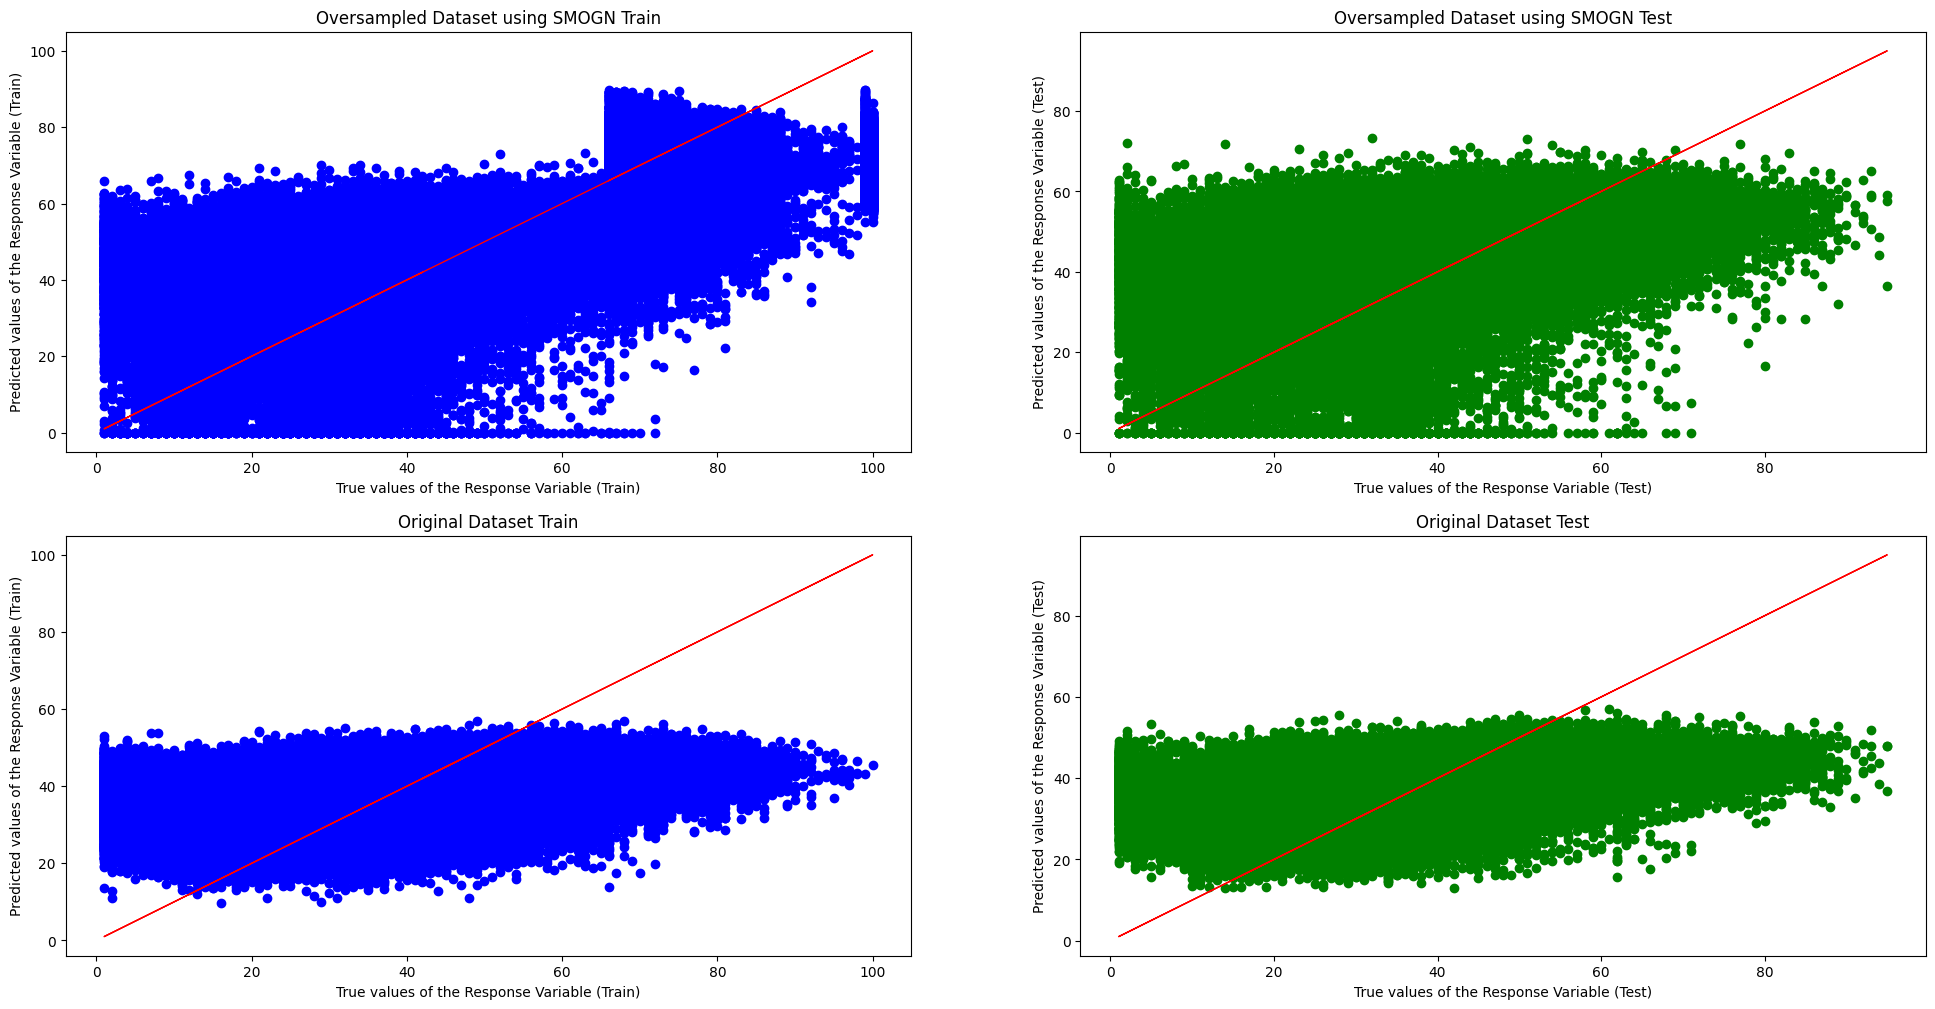

Goodness of Fit of Model 	Non-sampled Train Dataset
Explained Variance (R^2) 	: 0.18797500428421432
Mean Squared Error (MSE) 	: 225.8808611133835
Root Mean Squared Error (RMSE) 	: 15.029333355587783

Goodness of Fit of Model 	Non-sampled Test Dataset
Explained Variance (R^2) 	: 0.19034460038090584
Mean Squared Error (MSE) 	: 226.66989603062234
Root Mean Squared Error (RMSE) 	: 15.055560302779247

Goodness of Fit of Model 	Train Dataset with SMOGN Sampling
Explained Variance (R^2) 	: 0.5217680666262854
Mean Squared Error (MSE) 	: 279.76688829275673
Root Mean Squared Error (RMSE) 	: 16.72623353575923

Goodness of Fit of Model 	Test Dataset with SMOGN Sampling
Explained Variance (R^2) 	: -0.1187648669393555
Mean Squared Error (MSE) 	: 313.20771304824177
Root Mean Squared Error (RMSE) 	: 17.69767535718298



In [11]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0][0].scatter(smogn_y_train, smogn_y_train_pred, color = "blue")
axes[0][0].plot(smogn_y_train, smogn_y_train, 'r-', linewidth = 1)
axes[0][0].set_xlabel("True values of the Response Variable (Train)")
axes[0][0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0][1].scatter(y_test, smogn_y_test_pred, color = "green")
axes[0][1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[0][1].set_xlabel("True values of the Response Variable (Test)")
axes[0][1].set_ylabel("Predicted values of the Response Variable (Test)")

axes[1][0].scatter(y_train, y_train_pred, color = "blue")
axes[1][0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[1][0].set_xlabel("True values of the Response Variable (Train)")
axes[1][0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1][1].scatter(y_test, y_test_pred, color = "green")
axes[1][1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1][1].set_xlabel("True values of the Response Variable (Test)")
axes[1][1].set_ylabel("Predicted values of the Response Variable (Test)")

axes[0, 0].set_title("Oversampled Dataset using SMOGN Train")
axes[0, 1].set_title("Oversampled Dataset using SMOGN Test")
axes[1, 0].set_title("Original Dataset Train")
axes[1, 1].set_title("Original Dataset Test")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tNon-sampled Train Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tNon-sampled Test Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(smogn_y_train, smogn_y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(smogn_y_train, smogn_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(smogn_y_train, smogn_y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(y_test, smogn_y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, smogn_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, smogn_y_test_pred)))
print()

Let's stick with the <u>***non-sampled dataset (not sampled with SMOGN)***</u> and try various regression techniques to see which one has the best variance and lowest MSE

---

## **Fitting Different Regression Models on <u>Non-sampled Dataset</u>**

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# Initialize the models
models = {
    "Linear Regression": LinearRegression(), 
    "Ridge Regression": Ridge(alpha=1.0), # L2 regularization to prevent overfitting
    "Lasso Regression": Lasso(alpha=0.1), # L1 regularization to prevent overfitting
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42),
    "Extra Tree Regression": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    variance = r2_score(y_test, predictions)
    results[name] = mse, variance

# Display results
for name, metrics in results.items():
    print(f'{name}: MSE = {metrics[0]}')
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics[0]))
    print("Explained Variance (R^2) \t:", metrics[1])
    print()

Linear Regression: MSE = 226.66989603062234
Root Mean Squared Error (RMSE) 	: 15.055560302779247
Explained Variance (R^2) 	: 0.19034460038090584

Ridge Regression: MSE = 226.67018629993296
Root Mean Squared Error (RMSE) 	: 15.055569942713326
Explained Variance (R^2) 	: 0.19034356355105408

Lasso Regression: MSE = 228.80431645365124
Root Mean Squared Error (RMSE) 	: 15.126279002241471
Explained Variance (R^2) 	: 0.18272053979401093

Decision Tree: MSE = 214.55670394589401
Root Mean Squared Error (RMSE) 	: 14.647754228751042
Explained Variance (R^2) 	: 0.23361241648604314

Random Forest: MSE = 218.44956732495953
Root Mean Squared Error (RMSE) 	: 14.780039489966173
Explained Variance (R^2) 	: 0.21970727111811117

Gradient Boosting: MSE = 201.52151195329495
Root Mean Squared Error (RMSE) 	: 14.195827272592991
Explained Variance (R^2) 	: 0.2801735777460881

Extra Tree Regression: MSE = 203.6706529320106
Root Mean Squared Error (RMSE) 	: 14.271322746403383
Explained Variance (R^2) 	: 0.27249

From the above, <u>Gradient Boosting Regression</u> has the lowest RMSE value and the highest R^2 value, which suggest that it is the best regression model to predict popularity of track using voice analysis data.

To ensure that this model still works with other train/test splitting, 5-fold cross validation is employed, and the average R^2 value is taken.

In [13]:
from sklearn.model_selection import cross_val_score, KFold

# We use df as cross validation will split the dataset into different train/test datasets
# To ensure that the model generalises to different datasets
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
track_pop= pd.DataFrame(df['Track Popularity']).values.ravel()   # Response
voice_analysis = pd.DataFrame(df[predictors]) # Predictor

# Employ 5-fold cross validation here
# It takes a while to run (around 15 minutes)!
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
r2_scores = cross_val_score(model, voice_analysis, track_pop, scoring='r2', cv=kf)
mse_scores = cross_val_score(model, voice_analysis, track_pop, scoring='neg_mean_squared_error', cv=kf)

# Take the average
average_r2_score = np.mean(r2_scores)
average_mse_score = np.mean(mse_scores)

In [14]:
print("Average R2 score: " + str(average_r2_score))
print("Average MSE score: " + str(average_mse_score * -1))

Average R2 score: 0.22753229143102285
Average MSE score: 261.67170161594925


Although the R2 score using Gradient Boost regression is improved compared to linear regression, the MSE is still very high. Therefore, the <ins> **regression model is inaccurate.**<ins>

We can improve the prediction by changing the label from a continuous numerical variable to a categorical variable, i.e. ‘Popular’ or ‘Not Popular’. We set tracks with popularity above 50 as ‘popular’ and tracks with popularity below 50 as ‘not popular’. 50 is chosen as the threshold as it aligns with the intuitive notion of 'popularity'. Mean and median are not used as a song with mean or median popularity may not necessarily be popular.

As such, we have converted the problem from a regression one to a classification one.

---

# **Using Classification Models to Predict Song Popularity**
## **Overview of Datasets Used in Classification**
In the data-resampling notebook, we have added a column on the merged200k dataset to indicate whether the song is popular or not. We have saved this updated merged200k dataset as merged200k_classification.csv.

In [15]:
# Let's import the csv file
df_classification = pd.read_csv("datasets/merged200k_classification.csv")

# Check the dataframe
df_classification.head()

,Unnamed: 0,Track Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,Artist Genres,track_id,Track Popularity Cat
0,0,act ii: date @ 8 (feat. Drake) - remix,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,87,NaN,3QS9ZCtoSCJhmaJ7QNXSAS,1
1,1,LEAP!,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,NaN,3vl2uH4D2QItFFhzz5L06g,0
2,2,Overdrive,0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,"bedroom pop, pop, pov: indie",3QyoC6OvQUmpQwQZ18iaTs,1
3,3,Raise y_our glass,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,60,NaN,7j1vFohEm1lbsctYY9gyGd,1
4,4,In My Mind,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,73,gen z singer-songwriter,2W779g2UrRZtVdf3FcEOO1,1


The data-resampling notebook also shows that the merged200k_classification.csv dataset has been split into train/test dataset (classification_training.csv + classification_test.csv). Due to imbalance of the dataset, the data-resampling notebook also resampled classification_training.csv using 4 different resampling methods to get smote.csv, rdmover.csv, rdmunder.csv and nearmiss.csv.

Again, for fair comparison between the datasets, we will use classification_test.csv as the common test dataset.

Let's seperate each training dataset into X_train and y_train.

In [16]:
# First convert each dataset from csv to pandas dataframe
classification_training = pd.read_csv("datasets/classification_training.csv")
smote = pd.read_csv("datasets/smote.csv")
rdmover = pd.read_csv("datasets/rdmover.csv")
rdmunder = pd.read_csv("datasets/rdmunder.csv")
nearmiss = pd.read_csv("datasets/nearmiss.csv")

In [17]:
# Let's split into X_train and y_train
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
response = "Track Popularity Cat"

# Non-sampled training dataset
X_train = classification_training[predictors]
y_train = classification_training[response]

# Dataset oversampled using SMOTE
X_train_smote = smote[predictors]
y_train_smote = smote[response]

# Dataset oversampled by Random Oversampling
X_train_rdmover = rdmover[predictors]
y_train_rdmover = rdmover[response]

# Dataset undersampled by Random Undersampling
X_train_rdmunder = rdmunder[predictors]
y_train_rdmunder = rdmunder[response]

# Dataset undersampled by Nearmiss
X_train_nearmiss = nearmiss[predictors]
y_train_nearmiss = nearmiss[response]

In [18]:
# Now convert the testing data
classification_test = pd.read_csv("datasets/classification_test.csv")

In [19]:
# Split to X_test and y_test
X_test = classification_test[predictors]
y_test = classification_test[response]

## **Comparing Which Dataset Performs Best in a Logistic Regression Model**
Let's start with the <u>non-sampled classification_training</u> dataset.

In [20]:
# Import sci-kit library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Predict track popularity category using <u>**logistic regression**</u> in <u>non-sampled</u> dataset

In [21]:
def calculate_rates(y_true, y_pred):
    tp = tn = fp = fn = 0
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    # Calculate rates and round to two decimal places
    tpr = round(tp / (tp + fn), 2) if (tp + fn) != 0 else 0  # True Positive Rate
    tnr = round(tn / (tn + fp), 2) if (tn + fp) != 0 else 0  # True Negative Rate
    fpr = round(fp / (tn + fp), 2) if (tn + fp) != 0 else 0  # False Positive Rate
    fnr = round(fn / (tp + fn), 2) if (tp + fn) != 0 else 0  # False Negative Rate
    
    print("True Positive Rate (TPR):", tpr)
    print("True Negative Rate (TNR):", tnr)
    print("False Positive Rate (FPR):", fpr)
    print("False Negative Rate (FNR):", fnr)


In [22]:
# Write a function to evaluate classification models
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__}: Accuracy = {accuracy:.4f}")
    print(classification_report(y_test, predictions))
    calculate_rates(y_test, predictions)

# Non-sampled Dataset
print("Non-sampled Dataset")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train, y_train, X_test, y_test)

Non-sampled Dataset
LogisticRegression: Accuracy = 0.7733
              precision    recall  f1-score   support

           0       0.78      0.99      0.87     34818
           1       0.57      0.06      0.10     10403

    accuracy                           0.77     45221
   macro avg       0.68      0.52      0.49     45221
weighted avg       0.73      0.77      0.69     45221

True Positive Rate (TPR): 0.06
True Negative Rate (TNR): 0.99
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 0.94


While the accuracy is high, the model false negative rate is very high at 94%. This is due to the imbalance in the classification_training dataset, where 78% of the dataset are non-popular songs (as explained in the data-resampling notebook).

As such, this model is more likely to predict negative instead of positive due to the overwhelmingly negative data points in the training dataset.

Now, let's try logistic regressions in the datasets that has been sampled such that there's equal amount of popular and non-popular songs.

### Predict track popularity category using <u>**logistic regression**</u> in <u>sampled</u> datasets

In [23]:
# Random Over Sampling
print("Random Over Sampling")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_rdmover, y_train_rdmover, X_test, y_test)
print()

# SMOTE
print("SMOTE")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_smote, y_train_smote, X_test, y_test)
print()

# Random Under Sampling
print("Random Under Sampling")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_rdmunder, y_train_rdmunder, X_test, y_test)
print()

# NearMiss
print("NearMiss")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_nearmiss, y_train_nearmiss, X_test, y_test)
print()

Random Over Sampling
LogisticRegression: Accuracy = 0.6020
              precision    recall  f1-score   support

           0       0.88      0.56      0.68     34818
           1       0.34      0.76      0.47     10403

    accuracy                           0.60     45221
   macro avg       0.61      0.66      0.57     45221
weighted avg       0.76      0.60      0.63     45221

True Positive Rate (TPR): 0.76
True Negative Rate (TNR): 0.56
False Positive Rate (FPR): 0.44
False Negative Rate (FNR): 0.24

SMOTE
LogisticRegression: Accuracy = 0.6104
              precision    recall  f1-score   support

           0       0.88      0.57      0.69     34818
           1       0.34      0.74      0.47     10403

    accuracy                           0.61     45221
   macro avg       0.61      0.66      0.58     45221
weighted avg       0.76      0.61      0.64     45221

True Positive Rate (TPR): 0.74
True Negative Rate (TNR): 0.57
False Positive Rate (FPR): 0.43
False Negative Rate (F

From the values above, the dataset sampled with <u>NearMiss</u> has the highest accuracy, but dataset sampled with SMOTE, Random Over Sampling and Random Under Sampling has significantly better positive recall and lower false negatives. However, all 4 sampled datasets perform better than the non-sampled dataset.

We shall proceed with fitting different classification models on all of the sampled datasets.

---

## **Fitting Different Classification Models on <u>Sampled Datasets</u>**

In [24]:
# Import different classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
# List of models to evaluate
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# List of training datasets
train_sets = [
    ("Random Over Sampling", X_train_rdmover, y_train_rdmover),
    ("SMOTE", X_train_smote, y_train_smote),
    ("Random Under Sampling", X_train_rdmunder, y_train_rdmunder),
    ("NearMiss", X_train_nearmiss, y_train_nearmiss)
]

# Train and evaluate each model, but only print the classification report of the highest accuracy
def modified_train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, predictions

# This will take a while to run (around 5 mins)!
for train_set in train_sets:
    best_predictions = []
    best_accuracy = 0
    best_model = ""
    for model in models:
        accuracy, predictions = modified_train_evaluate(model, train_set[1], train_set[2], X_test, y_test)
        if accuracy > best_accuracy: 
            best_accuracy = accuracy
            best_predictions = predictions
            best_model = model.__class__.__name__
    print("For dataset: " + train_set[0])
    print("Best model is " + best_model)
    print(classification_report(y_test, best_predictions))
    calculate_rates(y_test, best_predictions)
    print()

For dataset: Random Over Sampling
Best model is RandomForestClassifier
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     34818
           1       0.50      0.30      0.37     10403

    accuracy                           0.77     45221
   macro avg       0.65      0.60      0.62     45221
weighted avg       0.74      0.77      0.75     45221

True Positive Rate (TPR): 0.3
True Negative Rate (TNR): 0.91
False Positive Rate (FPR): 0.09
False Negative Rate (FNR): 0.7

For dataset: SMOTE
Best model is RandomForestClassifier
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     34818
           1       0.39      0.54      0.45     10403

    accuracy                           0.70     45221
   macro avg       0.62      0.64      0.62     45221
weighted avg       0.74      0.70      0.71     45221

True Positive Rate (TPR): 0.54
True Negative Rate (TNR): 0.75
False Positive Rate (FPR): 0.25


Random Forest Classifier seems to have the highest accuracy as compared to the other classification models across the 4 sampled datasets.

Let's visualise how the sampled datasets perform using Random Forest Classifier in a confusion matrix.

### **Visualisation on Confusion Matrix**
Let's visualise both SMOTE dataset and Random Over Sampling dataset in a confusion matrix.

In [26]:
from sklearn.metrics import confusion_matrix

# Fit the Random Forest Classifier Model to each dataset
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train_smote, y_train_smote)
y_test_pred_smote = randomforest.predict(X_test)
randomforest.fit(X_train_rdmover, y_train_rdmover)
y_test_pred_rdmover = randomforest.predict(X_test)
randomforest.fit(X_train_rdmunder, y_train_rdmunder)
y_test_pred_rdmunder = randomforest.predict(X_test)
randomforest.fit(X_train_nearmiss, y_train_nearmiss)
y_test_pred_nearmiss = randomforest.predict(X_test)

# Make the confusion matrix
cm_rdmover = confusion_matrix(y_test, y_test_pred_rdmover)
cm_smote = confusion_matrix(y_test, y_test_pred_smote)
cm_rdmunder = confusion_matrix(y_test, y_test_pred_rdmunder)
cm_nearmiss = confusion_matrix(y_test, y_test_pred_nearmiss)

In [27]:
def calculate_rates_using_cm(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)  # True Positive Rate
    TNR = TN / (TN + FP)  # True Negative Rate
    FPR = FP / (TN + FP)  # False Positive Rate
    FNR = FN / (TP + FN)  # False Negative Rate
    return TPR, TNR, FPR, FNR

rates1 = calculate_rates_using_cm(cm_rdmover)
rates2 = calculate_rates_using_cm(cm_smote)
rates3 = calculate_rates_using_cm(cm_rdmunder)
rates4 = calculate_rates_using_cm(cm_nearmiss)

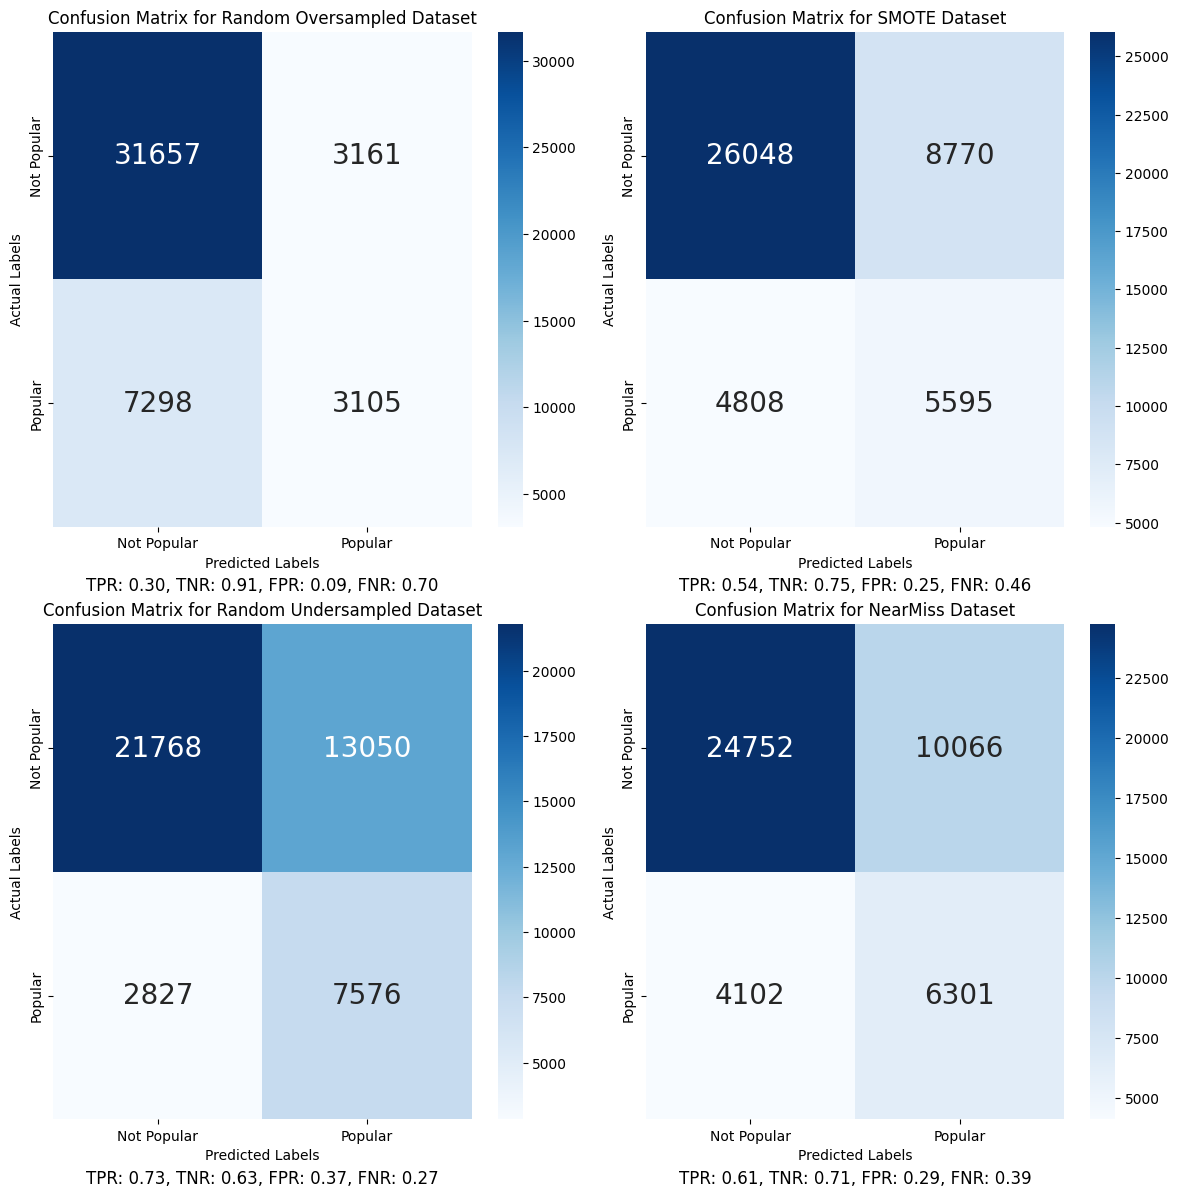

In [28]:
# Plotting confusion matrix
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(12, 12))

# Random Oversampled Dataset
sb.heatmap(cm_rdmover, annot=True, ax=ax1, cmap='Blues', fmt='g', annot_kws={'size': 20})
ax1.set_title('Confusion Matrix for Random Oversampled Dataset')
ax1.set_xlabel('Predicted Labels')
ax1.set_ylabel('Actual Labels')
ax1.set_xticklabels(['Not Popular', 'Popular'])
ax1.set_yticklabels(['Not Popular', 'Popular'])
ax1.text(0.5, -0.1, f'TPR: {rates1[0]:.2f}, TNR: {rates1[1]:.2f}, FPR: {rates1[2]:.2f}, FNR: {rates1[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax1.transAxes)

# SMOTE Dataset
sb.heatmap(cm_smote, annot=True, ax=ax2, cmap='Blues', fmt='g', annot_kws={'size': 20})
ax2.set_title('Confusion Matrix for SMOTE Dataset')
ax2.set_xlabel('Predicted Labels')
ax2.set_ylabel('Actual Labels')
ax2.set_xticklabels(['Not Popular', 'Popular'])
ax2.set_yticklabels(['Not Popular', 'Popular'])
ax2.text(0.5, -0.1, f'TPR: {rates2[0]:.2f}, TNR: {rates2[1]:.2f}, FPR: {rates2[2]:.2f}, FNR: {rates2[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax2.transAxes)

# Random Undersampled Dataset
sb.heatmap(cm_rdmunder, annot=True, ax=ax3, cmap='Blues', fmt='g', annot_kws={'size': 20})
ax3.set_title('Confusion Matrix for Random Undersampled Dataset')
ax3.set_xlabel('Predicted Labels')
ax3.set_ylabel('Actual Labels')
ax3.set_xticklabels(['Not Popular', 'Popular'])
ax3.set_yticklabels(['Not Popular', 'Popular'])
ax3.text(0.5, -0.1, f'TPR: {rates3[0]:.2f}, TNR: {rates3[1]:.2f}, FPR: {rates3[2]:.2f}, FNR: {rates3[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax3.transAxes)

# NearMiss Dataset
sb.heatmap(cm_nearmiss, annot=True, ax=ax4, cmap='Blues', fmt='g', annot_kws={'size': 20})
ax4.set_title('Confusion Matrix for NearMiss Dataset')
ax4.set_xlabel('Predicted Labels')
ax4.set_ylabel('Actual Labels')
ax4.set_xticklabels(['Not Popular', 'Popular'])
ax4.set_yticklabels(['Not Popular', 'Popular'])
ax4.text(0.5, -0.1, f'TPR: {rates4[0]:.2f}, TNR: {rates4[1]:.2f}, FPR: {rates4[2]:.2f}, FNR: {rates4[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

---

# **Conclusion**

Choosing the right model depends on an agency's goals and resources. 

- **Random Oversampling**: This model has a low true positive rate but also a low false negative rate, making it ideal for emerging agencies with limited funds. It minimizes the risk of financial loss from falsely predicting unpopular tracks as hits.

- **Random Undersampling**: Suitable for large agencies focused on maximizing exposure, this model captures most popular tracks due to its high true positive rate, albeit at the cost of a higher false negative rate. Larger agencies can afford this approach due to their greater financial resilience.

- **SMOTE and NearMiss**: These models provide a balanced approach with moderate true positive and false negative rates, making them suitable for medium-sized agencies. They offer a balance between conservative and aggressive prediction of track popularity, appropriate for agencies with moderate risk tolerance.